## 5.1 Implement the movie review classifier found in section 3.4 of Deep Learning with Python [pages 68-78]

In [1]:
#Load libraries
import numpy as np
from keras.datasets import imdb

```
3.1 Loading the IMDB dataset
```

In [2]:
#From Robert Zacchigna to turn off warnings
np.warnings.filterwarnings('ignore', category = np.VisibleDeprecationWarning)

#Argument num_words = 10,000 means we only keep the top 10,000 most frequently occurring words
#The variables train_data and test_data are lists of reviews which are a list of word indices
#The variables train_labels and test_labels are lists of 0s and 1s. 0 = negative, 1 = positive
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
#Because restricting to the top 10,000  most frequent words, no word index will exceed 10,000
max([max(sequence) for sequence in train_data])

9999

In [4]:
#Decode one of these reviews back to English words
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])
	

1646592/1641221 [==============================] - 0s 0us/step


```
3.2 Encoding the integer sequences into a binary matrix
```

In [6]:
#Encoding the integer sequences into a binary matrix
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#Here is what the samples look like now
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
#Vectorize your labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#Now the data is ready to be fed into a neural network

```
3.3 The model definition
```

In [10]:
#Load in libraries
from keras import models
from keras import layers

In [11]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

```
3.4 Compiling the model
```

In [12]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

```
3.5 Configuring the optimizer
```

In [13]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

```
3.6 Using custom losses and metrics
```

In [14]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

```
3.7 Setting aside a validation set
```

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

```
3.8 Training your model
```

In [16]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5997 - acc: 0.7059 - val_loss: 0.3998 - val_acc: 0.8711
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3397 - acc: 0.9018 - val_loss: 0.3202 - val_acc: 0.8774
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2409 - acc: 0.9255 - val_loss: 0.3092 - val_acc: 0.8751
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1915 - acc: 0.9359 - val_loss: 0.2767 - val_acc: 0.8884
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1445 - acc: 0.9592 - val_loss: 0.3001 - val_acc: 0.8782
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1191 - acc: 0.9664 - val_loss: 0.2990 - val_acc: 0.8847
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0996 - acc: 0.9715 - val_loss: 0.3197 - val_acc: 0.8791
Epoch 8/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0813 - a

```
3.9 Ploting the training and validation less
```

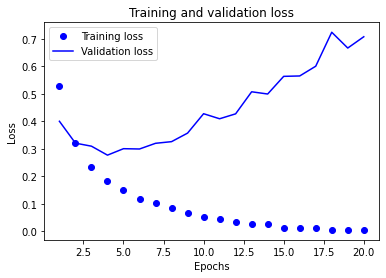

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc'] #came from general chat
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


```
3.10 Plotting the training and validation accuracy
```

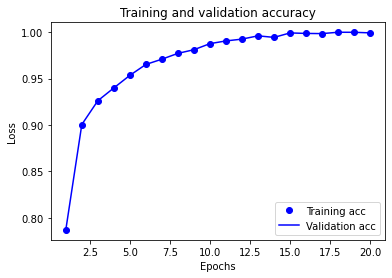

In [18]:
plt.clf()
val_acc = history.history['acc'] #Came from chat
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


```
The training loss decreases with every epoch, and the training accuracy increases with every epoch. To prevent overfitting, you could stop training after three epochs
```

```
3.11 Retraining a model from scratch
```

In [19]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.5480 - accuracy: 0.7358
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2690 - accuracy: 0.9150
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.1953 - accuracy: 0.9331
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3016 - accuracy: 0.8806


In [20]:
results #achieves 88% accuracy

[0.30164003372192383, 0.8805599808692932]

In [21]:
#Using a trained network to generate predictions on new data
model.predict(x_test)

array([[0.15626568],
       [0.99988985],
       [0.65604335],
       ...,
       [0.09303167],
       [0.05772743],
       [0.47996917]], dtype=float32)

## Implement the news classifier found in section 3.5 of Deep Learning with Python [pages 78-84]

```
3.12 Loading the Reuters dataset
```

In [22]:
from keras.datasets import reuters

#From Robert Zacchigna to turn off warnings
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

#argument num_words = 10,000 restricts the data to the 10,000 most frequently occuring words found in the data
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [24]:
len(train_data) #8,982 training examples

8982

In [25]:
len(test_data) #2,246 test examples

2246

```
3.13 Decoding newswires back to text
```

In [26]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[0]])

#Now can vectorize the data with the exact same code as in the previous example

557056/550378 [==============================] - 0s 0us/step


```
3.14 Encoding the data
```

In [27]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [28]:
#To vectorize the labels, can cast the label list as an integer tensor or one-hot encoding
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)


In [29]:
#Built-in way to do this in keras
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

```
3.15 Model delinition
```

In [30]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

#2 things to note:
#You end the network with a Dense layer of size 46. Each entry will encode a different output class
#The last layer uses a softmax activation

```
3.16 Compiling the model
```

In [31]:
#best loss function to use in this case is categorical_crossentropy
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

```
3.17 Setting aside a validation set
```

In [32]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

```
3.18 Training the model
```

In [33]:
#train the network for 20 epochs
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 32ms/step - loss: 3.1442 - accuracy: 0.4243 - val_loss: 1.7107 - val_accuracy: 0.6580
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 1.4678 - accuracy: 0.7042 - val_loss: 1.2925 - val_accuracy: 0.7130
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 1.0479 - accuracy: 0.7748 - val_loss: 1.1108 - val_accuracy: 0.7700
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 0.8201 - accuracy: 0.8328 - val_loss: 1.0116 - val_accuracy: 0.7880
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6545 - accuracy: 0.8603 - val_loss: 0.9319 - val_accuracy: 0.8000
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.4989 - accuracy: 0.8971 - val_loss: 0.9159 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.4048 - accuracy: 0.9117 - val_loss: 0.8882 - val_accuracy: 0.8130
Epoch 8/20
16

```
3.19 Plotting the training and validation loss
```

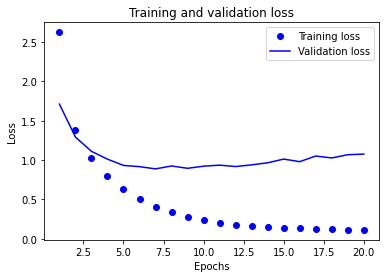

In [34]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

```
3.20 Plotting the training and validation accuracy
```

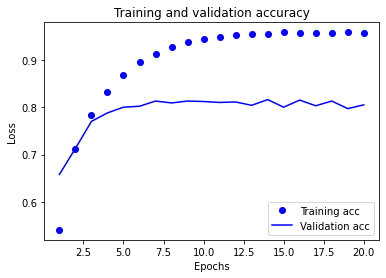

In [35]:
plt.clf()

acc = history.history['accuracy'] #Per general chat
val_acc = history.history['val_accuracy'] #Per general chat

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


```
 The network begins to overfit after nine epochs
 ```

```
3.21 Retraining a model from scratch
```

In [36]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 28ms/step - loss: 3.0867 - accuracy: 0.4097 - val_loss: 1.7388 - val_accuracy: 0.6370
Epoch 2/9
16/16 [==============================] - 0s 16ms/step - loss: 1.5174 - accuracy: 0.6908 - val_loss: 1.3284 - val_accuracy: 0.7030
Epoch 3/9
16/16 [==============================] - 0s 15ms/step - loss: 1.0981 - accuracy: 0.7646 - val_loss: 1.1547 - val_accuracy: 0.7390
Epoch 4/9
16/16 [==============================] - 0s 18ms/step - loss: 0.8617 - accuracy: 0.8154 - val_loss: 1.0278 - val_accuracy: 0.7920
Epoch 5/9
16/16 [==============================] - 0s 16ms/step - loss: 0.6705 - accuracy: 0.8630 - val_loss: 0.9763 - val_accuracy: 0.7970
Epoch 6/9
16/16 [==============================] - 0s 17ms/step - loss: 0.5439 - accuracy: 0.8893 - val_loss: 0.9204 - val_accuracy: 0.8100
Epoch 7/9
16/16 [==============================] - 0s 14ms/step - loss: 0.4302 - accuracy: 0.9139 - val_loss: 0.8873 - val_accuracy: 0.8190
Epoch 8/9
16/16 [===

In [37]:
#Final results
results #About 79% accuracy

[1.020650863647461, 0.7791629433631897]

In [38]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

#Closer to 18%, which book says is good, compared to random baseline

0.17764915405164738

```
3.22 Generating predictions for new data
```

In [39]:
predictions = model.predict(x_test)

In [40]:
#Each entry in predictions is a vector of length 46
predictions[0].shape

(46,)

In [41]:
#The coefficients in this vector sum to 1
np.sum(predictions[0])

1.0000001

In [42]:
#largest entry is the predicted class—the class with the highest probability
np.argmax(predictions[0])

3

In [43]:
#different way to handle the labels and loss
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [44]:
#With integer labels, you should use sparse_categorical_crossentropy
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

```
3.23 A model with an information bottleneck
```

In [45]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 10ms/step - loss: 3.4776 - accuracy: 0.3450 - val_loss: 3.0492 - val_accuracy: 0.4860
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 2.9496 - accuracy: 0.4010 - val_loss: 2.7116 - val_accuracy: 0.2350
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 2.4706 - accuracy: 0.2552 - val_loss: 1.9842 - val_accuracy: 0.2990
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 1.6627 - accuracy: 0.5485 - val_loss: 1.5187 - val_accuracy: 0.6180
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 1.3035 - accuracy: 0.6515 - val_loss: 1.4565 - val_accuracy: 0.6370
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 1.2048 - accuracy: 0.6702 - val_loss: 1.4408 - val_accuracy: 0.6330
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 1.0936 - accuracy: 0.6906 - val_loss: 1.4512 - val_accuracy: 0.6580
Epoch 8/20
63/63 [=

```
Now at 71% validation accuracy. Drop is due to fact that trying to compress a lot of information.
```

## 5.3 Implement the housing price regression model found in section 3.6 of Deep Learning with Python [pages 85-90]

```
3.24 Loading the Boston housing dataset
```

In [47]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [48]:
#Look at train data
train_data.shape

(404, 13)

In [49]:
#Look at test data
test_data.shape

(102, 13)

In [50]:
#Targets
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

```
3.25 Normalizing the data
```

In [51]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

```
3.26 Model definition
```

In [53]:
#Using less training data causes worse overfitting. Using a small network is one way to mitigate overfitting

from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model


```
3.27 K-fold validation
```

In [54]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [55]:
#Ran with 100 epochs gives us the following results
all_scores

[2.3203392028808594,
 2.8495006561279297,
 2.7895870208740234,
 2.3913373947143555]

In [56]:
np.mean(all_scores) #mean is 2.59

2.587691068649292

```
3.28 Saving the validation logs at each fold
```

In [58]:
#Now using 500 epochs
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
    

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


```
3.29 Building the history of successive mean K-fold validation scores
```

In [59]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

```
3.30 Plotting validation scores
```

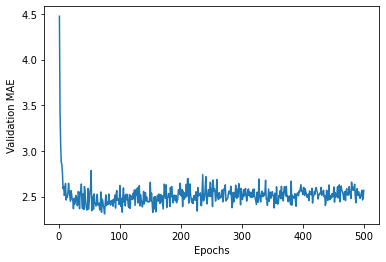

In [60]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

```
Plot looks odd because of scaling issues and high variance. To solve this need to omit the first 10 data points and replace each point with an exponential moving average of the previous points (this gives the smooth curve)
```

```
3.31 Plotting validation scores, excluding the first 10 data points
```

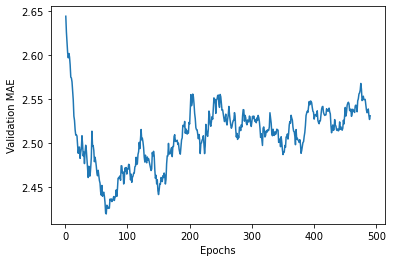

In [61]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

```
This plot shows MAE stops improving after 80 epochs. Past that is overfitting. 
```

```
3.32 Training the final model
```

In [62]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)


4/4 [==============================] - 0s 2ms/step - loss: 17.5328 - mae: 2.8139


In [63]:
#final result
test_mae_score

2.8138980865478516